In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/My\ Drive/chap4_modelXYZ/Y4

/content/gdrive/My Drive/chap4_modelXYZ/Y4


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os
from os.path import dirname, abspath
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from keras.wrappers.scikit_learn import KerasRegressor
import math
import sklearn
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.utils.vis_utils import plot_model

In [ ]:
# read csv data

df_A = pd.read_csv('A_features_and_ss.csv', index_col=0)
df_A.reset_index(drop=True, inplace=True) 
df_B = pd.read_csv('B_features_and_ss.csv', index_col=0)
df_C = pd.read_csv('C_features_and_ss.csv', index_col=0)
df_D = pd.read_csv('D_features_and_ss.csv', index_col=0)

In [ ]:
df = pd.concat([df_A, df_B, df_C, df_D])
df.reset_index(drop=True, inplace=True)
df

,Model,Sigma_y/E0,k/E0,E1/E0,cohesive_K,DI,Strain000,Strain001,Strain002,Strain003,...,Strain091,Strain092,Strain093,Strain094,Strain095,Strain096,Strain097,Strain098,Strain099,Strain100
0,A000,0.0169,0.0908,64.11,2128489,56.32,-0.0,0.001010,0.002018,0.003026,...,0.036845,0.037000,0.037155,0.037309,0.037463,0.037616,0.037768,0.037919,0.038070,0.038220
1,A002,0.0108,0.0878,114.88,8719778,122.34,-0.0,0.001033,0.002065,0.003096,...,0.029188,0.029337,0.029487,0.029636,0.029784,0.029932,0.030080,0.030227,0.030375,0.030522
2,A003,0.0126,0.0293,43.88,5494248,159.18,-0.0,0.000999,0.001997,0.002994,...,0.024345,0.024402,0.024458,0.024514,0.024569,0.024624,0.024678,0.024732,0.024785,0.024838
3,A004,0.0236,0.0407,30.34,8136985,78.48,-0.0,0.000980,0.001959,0.002937,...,0.040079,0.040168,0.040255,0.040343,0.040430,0.040516,0.040602,0.040687,0.040772,0.040857
4,A005,0.0070,0.0102,9.17,6381909,247.63,-0.0,0.000874,0.001747,0.002620,...,0.012922,0.012939,0.012956,0.012973,0.012990,0.013006,0.013023,0.013039,0.013055,0.013072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,D195,0.0218,0.0517,57.57,2952994,117.49,-0.0,0.002070,0.004137,0.006199,...,0.062475,0.062689,0.062902,0.063112,0.063319,0.063524,0.063726,0.063927,0.064124,0.064319
810,D196,0.0161,0.0833,130.16,6297275,61.86,-0.0,0.002342,0.004679,0.007008,...,0.062091,0.062395,0.062696,0.062995,0.063292,0.063586,0.063879,0.064169,0.064457,0.064743
811,D197,0.0056,0.0864,117.19,8623099,99.07,-0.0,0.002317,0.004541,0.006414,...,0.045033,0.045346,0.045656,0.045965,0.046272,0.046578,0.046881,0.047183,0.047483,0.047781
812,D198,0.0060,0.0316,149.23,325587,147.35,-0.0,0.002287,0.004494,0.006354,...,0.028324,0.028449,0.028572,0.028693,0.028812,0.028928,0.029043,0.029156,0.029267,0.029377


In [ ]:
AR_list = []
for i in range(214):
  AR_list.append(1)
for i in range(200):
  AR_list.append(4)
for i in range(200):
  AR_list.append(7)
for i in range(200):
  AR_list.append(10)
print(len(AR_list))
df.insert(1,"AR", AR_list, True)
df.head()

814


,Model,AR,Sigma_y/E0,k/E0,E1/E0,cohesive_K,DI,Strain000,Strain001,Strain002,...,Strain091,Strain092,Strain093,Strain094,Strain095,Strain096,Strain097,Strain098,Strain099,Strain100
0,A000,1,0.0169,0.0908,64.11,2128489,56.32,-0.0,0.001010,0.002018,...,0.036845,0.037000,0.037155,0.037309,0.037463,0.037616,0.037768,0.037919,0.038070,0.038220
1,A002,1,0.0108,0.0878,114.88,8719778,122.34,-0.0,0.001033,0.002065,...,0.029188,0.029337,0.029487,0.029636,0.029784,0.029932,0.030080,0.030227,0.030375,0.030522
2,A003,1,0.0126,0.0293,43.88,5494248,159.18,-0.0,0.000999,0.001997,...,0.024345,0.024402,0.024458,0.024514,0.024569,0.024624,0.024678,0.024732,0.024785,0.024838
3,A004,1,0.0236,0.0407,30.34,8136985,78.48,-0.0,0.000980,0.001959,...,0.040079,0.040168,0.040255,0.040343,0.040430,0.040516,0.040602,0.040687,0.040772,0.040857
4,A005,1,0.0070,0.0102,9.17,6381909,247.63,-0.0,0.000874,0.001747,...,0.012922,0.012939,0.012956,0.012973,0.012990,0.013006,0.013023,0.013039,0.013055,0.013072


In [ ]:
Ec_list = []
for j in range(len(df)):
  xi = 2 * df['AR'][j]
  nu = (df['E1/E0'][j]-1)/(df['E1/E0'][j]+xi)
  Ec_E0 = (1+nu*xi*0.2)/(1-nu*0.2)
  Ec_list.append(Ec_E0)
print(Ec_list)

[1.7079344899790605, 1.7260902830910483, 1.6896847523053828, 1.6650045330915684, 1.5140520134228188, 1.7223858615611192, 1.6102137176938374, 1.6629526462395543, 1.4392265193370164, 1.7352787228474222, 1.4839167455061495, 1.7189226519337018, 1.735774619392039, 1.6958718244803697, 1.6835734529995277, 1.707482993197279, 1.223314606741573, 1.7328380522333415, 1.5445580715850988, 1.728874032900173, 1.7327834231145938, 1.6869959677419355, 1.7054913752175977, 1.701340830449827, 1.735492856037551, 1.7201274561869357, 1.7308464995913921, 1.7357789351266621, 1.7257751937984498, 1.7243127226230703, 1.735068485878106, 1.7065704138357012, 1.6145883485796821, 1.7118178115666578, 1.7275610339875538, 1.717417747914736, 1.7319131832797428, 1.7203916201705443, 1.6868119523702538, 1.7360794892100573, 1.7270857096301127, 1.7335449333021298, 1.7189295183384887, 1.6879686810763121, 1.338815789473684, 1.4432933478735008, 1.7243197589481374, 1.7304116172168826, 1.7059031044214488, 1.7065905232288934, 1.629756

In [ ]:
df.insert(1,"Ec/E0", Ec_list, True)
df.head()

,Model,Ec/E0,AR,Sigma_y/E0,k/E0,E1/E0,cohesive_K,DI,Strain000,Strain001,...,Strain091,Strain092,Strain093,Strain094,Strain095,Strain096,Strain097,Strain098,Strain099,Strain100
0,A000,1.707934,1,0.0169,0.0908,64.11,2128489,56.32,-0.0,0.001010,...,0.036845,0.037000,0.037155,0.037309,0.037463,0.037616,0.037768,0.037919,0.038070,0.038220
1,A002,1.726090,1,0.0108,0.0878,114.88,8719778,122.34,-0.0,0.001033,...,0.029188,0.029337,0.029487,0.029636,0.029784,0.029932,0.030080,0.030227,0.030375,0.030522
2,A003,1.689685,1,0.0126,0.0293,43.88,5494248,159.18,-0.0,0.000999,...,0.024345,0.024402,0.024458,0.024514,0.024569,0.024624,0.024678,0.024732,0.024785,0.024838
3,A004,1.665005,1,0.0236,0.0407,30.34,8136985,78.48,-0.0,0.000980,...,0.040079,0.040168,0.040255,0.040343,0.040430,0.040516,0.040602,0.040687,0.040772,0.040857
4,A005,1.514052,1,0.0070,0.0102,9.17,6381909,247.63,-0.0,0.000874,...,0.012922,0.012939,0.012956,0.012973,0.012990,0.013006,0.013023,0.013039,0.013055,0.013072


In [ ]:
column_list = []
for i in range(101):
  column_list.append(f"Strain{i:03d}")
print(column_list)

['Strain000', 'Strain001', 'Strain002', 'Strain003', 'Strain004', 'Strain005', 'Strain006', 'Strain007', 'Strain008', 'Strain009', 'Strain010', 'Strain011', 'Strain012', 'Strain013', 'Strain014', 'Strain015', 'Strain016', 'Strain017', 'Strain018', 'Strain019', 'Strain020', 'Strain021', 'Strain022', 'Strain023', 'Strain024', 'Strain025', 'Strain026', 'Strain027', 'Strain028', 'Strain029', 'Strain030', 'Strain031', 'Strain032', 'Strain033', 'Strain034', 'Strain035', 'Strain036', 'Strain037', 'Strain038', 'Strain039', 'Strain040', 'Strain041', 'Strain042', 'Strain043', 'Strain044', 'Strain045', 'Strain046', 'Strain047', 'Strain048', 'Strain049', 'Strain050', 'Strain051', 'Strain052', 'Strain053', 'Strain054', 'Strain055', 'Strain056', 'Strain057', 'Strain058', 'Strain059', 'Strain060', 'Strain061', 'Strain062', 'Strain063', 'Strain064', 'Strain065', 'Strain066', 'Strain067', 'Strain068', 'Strain069', 'Strain070', 'Strain071', 'Strain072', 'Strain073', 'Strain074', 'Strain075', 'Strain076'

In [ ]:
df_train = df.iloc[:714,:]
df_test = df.iloc[714:,:]
df_train

,Model,Ec/E0,AR,Sigma_y/E0,k/E0,E1/E0,cohesive_K,DI,Strain000,Strain001,...,Strain091,Strain092,Strain093,Strain094,Strain095,Strain096,Strain097,Strain098,Strain099,Strain100
0,A000,1.707934,1,0.0169,0.0908,64.11,2128489,56.32,-0.0,0.001010,...,0.036845,0.037000,0.037155,0.037309,0.037463,0.037616,0.037768,0.037919,0.038070,0.038220
1,A002,1.726090,1,0.0108,0.0878,114.88,8719778,122.34,-0.0,0.001033,...,0.029188,0.029337,0.029487,0.029636,0.029784,0.029932,0.030080,0.030227,0.030375,0.030522
2,A003,1.689685,1,0.0126,0.0293,43.88,5494248,159.18,-0.0,0.000999,...,0.024345,0.024402,0.024458,0.024514,0.024569,0.024624,0.024678,0.024732,0.024785,0.024838
3,A004,1.665005,1,0.0236,0.0407,30.34,8136985,78.48,-0.0,0.000980,...,0.040079,0.040168,0.040255,0.040343,0.040430,0.040516,0.040602,0.040687,0.040772,0.040857
4,A005,1.514052,1,0.0070,0.0102,9.17,6381909,247.63,-0.0,0.000874,...,0.012922,0.012939,0.012956,0.012973,0.012990,0.013006,0.013023,0.013039,0.013055,0.013072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,D095,4.282655,10,0.0148,0.0391,44.80,5635080,148.44,-0.0,0.001968,...,0.046824,0.046980,0.047134,0.047286,0.047436,0.047585,0.047731,0.047876,0.048018,0.048159
710,D096,3.853261,10,0.0108,0.0305,32.25,8523952,53.13,-0.0,0.001812,...,0.036263,0.036383,0.036502,0.036619,0.036734,0.036848,0.036960,0.037071,0.037181,0.037288
711,D097,5.468396,10,0.0164,0.0829,151.07,8288365,131.31,-0.0,0.002379,...,0.062882,0.063185,0.063485,0.063784,0.064079,0.064373,0.064665,0.064954,0.065241,0.065526
712,D098,5.537828,10,0.0112,0.0102,168.26,6953378,246.49,-0.0,0.002401,...,0.029252,0.029249,0.029244,0.029237,0.029228,0.029217,0.029205,0.029191,0.029176,0.029161


In [ ]:
df_train_features = df_train.drop(columns=['Model', 'AR']+column_list)
df_train_features

,Ec/E0,Sigma_y/E0,k/E0,E1/E0,cohesive_K,DI
0,1.707934,0.0169,0.0908,64.11,2128489,56.32
1,1.726090,0.0108,0.0878,114.88,8719778,122.34
2,1.689685,0.0126,0.0293,43.88,5494248,159.18
3,1.665005,0.0236,0.0407,30.34,8136985,78.48
4,1.514052,0.0070,0.0102,9.17,6381909,247.63
...,...,...,...,...,...,...
709,4.282655,0.0148,0.0391,44.80,5635080,148.44
710,3.853261,0.0108,0.0305,32.25,8523952,53.13
711,5.468396,0.0164,0.0829,151.07,8288365,131.31
712,5.537828,0.0112,0.0102,168.26,6953378,246.49


In [ ]:
df_train_ss = df_train.drop(columns=['Model', 'AR', 'Ec/E0', 'Sigma_y/E0', 'k/E0', 'E1/E0', 'cohesive_K', 'DI'])
df_train_ss

,Strain000,Strain001,Strain002,Strain003,Strain004,Strain005,Strain006,Strain007,Strain008,Strain009,...,Strain091,Strain092,Strain093,Strain094,Strain095,Strain096,Strain097,Strain098,Strain099,Strain100
0,-0.0,0.001010,0.002018,0.003026,0.004033,0.005039,0.006044,0.007048,0.008048,0.009042,...,0.036845,0.037000,0.037155,0.037309,0.037463,0.037616,0.037768,0.037919,0.038070,0.038220
1,-0.0,0.001033,0.002065,0.003096,0.004125,0.005151,0.006165,0.007166,0.008147,0.009105,...,0.029188,0.029337,0.029487,0.029636,0.029784,0.029932,0.030080,0.030227,0.030375,0.030522
2,-0.0,0.000999,0.001997,0.002994,0.003991,0.004986,0.005978,0.006962,0.007935,0.008894,...,0.024345,0.024402,0.024458,0.024514,0.024569,0.024624,0.024678,0.024732,0.024785,0.024838
3,-0.0,0.000980,0.001959,0.002937,0.003915,0.004891,0.005867,0.006842,0.007816,0.008788,...,0.040079,0.040168,0.040255,0.040343,0.040430,0.040516,0.040602,0.040687,0.040772,0.040857
4,-0.0,0.000874,0.001747,0.002620,0.003489,0.004349,0.005195,0.006022,0.006824,0.007582,...,0.012922,0.012939,0.012956,0.012973,0.012990,0.013006,0.013023,0.013039,0.013055,0.013072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,-0.0,0.001968,0.003932,0.005893,0.007840,0.009753,0.011604,0.013354,0.014982,0.016495,...,0.046824,0.046980,0.047134,0.047286,0.047436,0.047585,0.047731,0.047876,0.048018,0.048159
710,-0.0,0.001812,0.003621,0.005424,0.007196,0.008899,0.010479,0.011921,0.013253,0.014478,...,0.036263,0.036383,0.036502,0.036619,0.036734,0.036848,0.036960,0.037071,0.037181,0.037288
711,-0.0,0.002379,0.004752,0.007118,0.009449,0.011710,0.013858,0.015859,0.017698,0.019411,...,0.062882,0.063185,0.063485,0.063784,0.064079,0.064373,0.064665,0.064954,0.065241,0.065526
712,-0.0,0.002401,0.004794,0.007131,0.009307,0.011218,0.012867,0.014336,0.015643,0.016742,...,0.029252,0.029249,0.029244,0.029237,0.029228,0.029217,0.029205,0.029191,0.029176,0.029161


In [ ]:
print(df_train_features.shape)
print(df_train_ss.shape)

(714, 6)
(714, 101)


In [ ]:
df_test_features = df_test.drop(columns = column_list + ['Model', 'AR'])
df_test_ss = df_test.drop(columns=['Model', 'AR', 'Ec/E0', 'Sigma_y/E0', 'k/E0', 'E1/E0', 'cohesive_K', 'DI'])
print(df_test_features.shape)
print(df_test_ss.shape)

(100, 6)
(100, 101)


In [ ]:
df_train_features = np.asarray(df_train_features).astype('float32')
input_norm_scaler = MinMaxScaler() 
df_train_features_scaled = input_norm_scaler.fit_transform(df_train_features)
df_train_features_scaled

array([[0.15093848, 0.59499997, 0.897664  , 0.31744274, 0.20371304,
        0.02993232],
       [0.1548647 , 0.29000002, 0.8642937 , 0.5730179 , 0.8705537 ,
        0.36094254],
       [0.14699197, 0.38      , 0.21357065, 0.21560535, 0.5442268 ,
        0.5456505 ],
       ...,
       [0.9641413 , 0.57      , 0.80978864, 0.75519764, 0.8269076 ,
        0.4059162 ],
       [0.97915596, 0.31      , 0.00111236, 0.8417317 , 0.69184697,
        0.98340434],
       [0.9707194 , 0.555     , 0.5984427 , 0.79114026, 0.8319198 ,
        0.9201303 ]], dtype=float32)

In [ ]:
df_test_features = np.asarray(df_test_features).astype('float32')
df_test_features_scaled = input_norm_scaler.transform(df_test_features)
df_test_features_scaled

array([[ 9.56924617e-01,  7.10000038e-01,  9.34371531e-01,
         7.18852341e-01,  8.47316831e-02,  8.14690292e-01],
       [ 5.79530835e-01,  6.80000007e-01,  3.37041140e-01,
         1.38585463e-01,  1.63234428e-01,  5.48157394e-01],
       [ 7.47126698e-01,  2.40000010e-01,  8.57619584e-01,
         2.56229579e-01,  1.00840971e-01,  3.56380045e-01],
       [ 7.12883711e-01,  7.89999962e-01,  8.50945413e-01,
         2.24565834e-01,  4.79438961e-01,  3.38430703e-02],
       [ 6.30345106e-01,  5.55000007e-01,  7.95328140e-01,
         1.65970311e-01,  9.13782775e-01,  7.05790877e-01],
       [ 9.13222373e-01,  8.50000024e-01,  8.40934336e-01,
         5.49710572e-01,  7.77526319e-01,  7.03183770e-01],
       [ 9.65482295e-01,  7.99999952e-01,  8.76529455e-01,
         7.62295544e-01, -2.38356180e-04,  7.61494100e-01],
       [ 8.09825838e-01,  1.44999981e-01,  2.06896544e-01,
         3.31588238e-01,  8.68515670e-01,  3.15166712e-01],
       [ 9.31293905e-01,  2.50000060e-02,  9.721

In [ ]:
df_train_ss = np.asarray(df_train_ss).astype('float32')
df_train_ss.shape

(714, 101)

In [ ]:
X = df_train_features_scaled
Y = df_train_ss
print(X.shape)
print(Y.shape)

(714, 6)
(714, 101)


In [ ]:
df_test_ss

,Strain000,Strain001,Strain002,Strain003,Strain004,Strain005,Strain006,Strain007,Strain008,Strain009,...,Strain091,Strain092,Strain093,Strain094,Strain095,Strain096,Strain097,Strain098,Strain099,Strain100
714,-0.0,0.002331,0.004656,0.006975,0.009282,0.011554,0.013760,0.015872,0.017866,0.019726,...,0.069143,0.069481,0.069816,0.070148,0.070479,0.070807,0.071132,0.071455,0.071776,0.072094
715,-0.0,0.001741,0.003480,0.005215,0.006948,0.008676,0.010391,0.012087,0.013754,0.015369,...,0.052579,0.052750,0.052919,0.053086,0.053251,0.053414,0.053575,0.053734,0.053891,0.054046
716,-0.0,0.002013,0.004022,0.006009,0.007919,0.009679,0.011273,0.012738,0.014073,0.015191,...,0.050707,0.051012,0.051315,0.051617,0.051916,0.052215,0.052512,0.052807,0.053100,0.053391
717,-0.0,0.001976,0.003948,0.005916,0.007881,0.009838,0.011776,0.013688,0.015559,0.017368,...,0.067455,0.067772,0.068086,0.068398,0.068707,0.069015,0.069320,0.069623,0.069924,0.070222
718,-0.0,0.001839,0.003675,0.005508,0.007337,0.009149,0.010934,0.012675,0.014343,0.015930,...,0.058228,0.058520,0.058811,0.059100,0.059387,0.059672,0.059955,0.060236,0.060516,0.060794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,-0.0,0.002070,0.004137,0.006199,0.008257,0.010307,0.012334,0.014330,0.016277,0.018151,...,0.062475,0.062689,0.062902,0.063112,0.063319,0.063524,0.063726,0.063927,0.064124,0.064319
810,-0.0,0.002342,0.004679,0.007008,0.009303,0.011529,0.013640,0.015606,0.017412,0.019098,...,0.062091,0.062395,0.062696,0.062995,0.063292,0.063586,0.063879,0.064169,0.064457,0.064743
811,-0.0,0.002317,0.004541,0.006414,0.007964,0.009150,0.010124,0.010977,0.011748,0.012465,...,0.045033,0.045346,0.045656,0.045965,0.046272,0.046578,0.046881,0.047183,0.047483,0.047781
812,-0.0,0.002287,0.004494,0.006354,0.007870,0.009075,0.009983,0.010738,0.011380,0.011950,...,0.028324,0.028449,0.028572,0.028693,0.028812,0.028928,0.029043,0.029156,0.029267,0.029377


In [ ]:
X_test = df_test_features_scaled
df_test_ss = np.asarray(df_test_ss).astype('float32')
Y_test = df_test_ss

In [ ]:
Y_std_scaler = StandardScaler()
Y_std = Y_std_scaler.fit_transform(Y)
Y_test_std = Y_std_scaler.transform(Y_test)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y_std, random_state=42, test_size=0.2)

In [ ]:
print(X_train.shape)
print(X_val.shape)
# print(X_test.shape)
print(Y_train.shape)
print(Y_val.shape)
# print(y_test.shape)

(571, 6)
(143, 6)
(571, 101)
(143, 101)


In [ ]:
pca = PCA(n_components=5)
Y_train_pca = pca.fit_transform(Y_train)
Y_val_pca = pca.transform(Y_val)
Y_train_pca

array([[-9.7218256e+00, -3.5334227e+00, -6.2473536e-01,  2.2747137e-01,
         1.4020476e-01],
       [-3.9342242e-01,  4.2614026e+00,  1.4590210e-01,  3.6760834e-01,
         1.1958025e-02],
       [-5.8536654e+00,  2.4019477e+00, -9.3602031e-01, -9.9587664e-03,
        -2.9440099e-01],
       ...,
       [-8.8344851e+00, -1.8338828e+00,  1.0150661e+00,  5.3923689e-02,
         9.5052585e-02],
       [-8.4262638e+00, -3.0565147e+00,  1.6890392e+00,  7.5059527e-01,
        -2.3977426e-01],
       [-1.6777021e+01,  1.1892440e+00,  1.2252601e+00, -5.7138979e-01,
         2.7618226e-01]], dtype=float32)

In [ ]:
np.sum(pca.explained_variance_ratio_) #達99.99%

0.99989736

In [ ]:
for i in range(5):
    print(f'{i+1} component explained variance ratio is {pca.explained_variance_ratio_[i]:.4f}')
print(f'{np.sum(pca.explained_variance_ratio_):.4f}')
weights = np.asarray(pca.explained_variance_ratio_).astype('float32')
print(f'Weights = {weights}')

1 component explained variance ratio is 0.9210
2 component explained variance ratio is 0.0625
3 component explained variance ratio is 0.0143
4 component explained variance ratio is 0.0019
5 component explained variance ratio is 0.0003
0.9999
Weights = [9.2095286e-01 6.2454555e-02 1.4342995e-02 1.8578580e-03 2.8899801e-04]


[0.9209529, 0.062454555, 0.014342991, 0.0018578566, 0.0002889982]


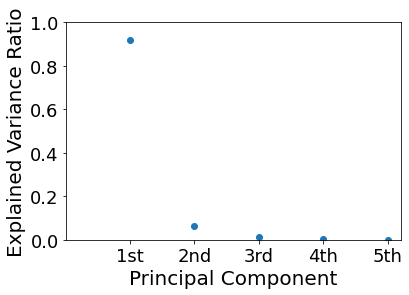

In [ ]:
pca_variance_list = []
one_to_ten = np.linspace(1,5,5)
label_pc = ['1st', '2nd', '3rd', '4th', '5th']

for i in range(5):
    pca_variance_list.append(pca.explained_variance_ratio_[i])
print(pca_variance_list)
# plt.figure(figsize=(10,8))
plt.scatter(one_to_ten, pca_variance_list)
plt.xlabel('Principal Component', fontsize=20)
plt.ylabel('Explained Variance Ratio', fontsize=20)
plt.xlim(0,)
plt.ylim(0, 1)
plt.xticks(one_to_ten, label_pc, fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('PCA_explained_variance_ratio.png', bbox_inches='tight')
plt.show()
# cum_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)
# plt.plot()

array([0.        , 0.9209529 , 0.9834075 , 0.99775046, 0.99960834,
       0.99989736], dtype=float32)

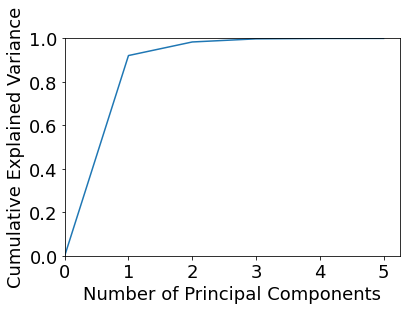

In [ ]:
cum_explained_var_ratio = np.cumsum(pca.explained_variance_ratio_)
cum_explained_var_ratio = np.insert(cum_explained_var_ratio, 0, 0)
plt.plot(cum_explained_var_ratio)
plt.xlabel('Number of Principal Components', fontsize=18)
plt.ylabel('Cumulative Explained Variance', fontsize=18)
plt.xlim(0,)
plt.ylim(0, 1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('PCA_cumulative_explained_variance_ratio.png', bbox_inches='tight')
cum_explained_var_ratio

In [ ]:
pca_norm_scaler = MinMaxScaler() 
train_pca_norm = pca_norm_scaler.fit_transform(Y_train_pca)
train_pca_norm

array([[0.24382792, 0.20833147, 0.3048467 , 0.5066545 , 0.4938378 ],
       [0.44926223, 0.8335016 , 0.42231944, 0.5738956 , 0.3905935 ],
       [0.3290143 , 0.6843673 , 0.25739568, 0.3927298 , 0.1439609 ],
       ...,
       [0.26336932, 0.34464005, 0.55481124, 0.42338213, 0.4574883 ],
       [0.27235937, 0.24658103, 0.65754884, 0.75766194, 0.18793784],
       [0.0884552 , 0.58710456, 0.5868523 , 0.12334162, 0.6033057 ]],
      dtype=float32)

In [ ]:
val_pca_norm = pca_norm_scaler.transform(Y_val_pca)
val_pca_norm

array([[ 0.23206952,  0.5901535 ,  0.43947393,  0.00192752,  0.3621316 ],
       [ 0.41821525,  0.33074188,  0.39275584,  0.30171603,  0.4707469 ],
       [ 0.18644083,  0.5285339 ,  0.39269072,  0.05287299,  0.44440043],
       [ 0.68105644,  0.6460249 ,  0.41013664,  0.30512932,  0.26241452],
       [ 0.73987424,  0.36171186,  0.5385226 ,  0.28524643,  0.51254725],
       [ 0.24117908,  0.31590354,  0.66679704,  0.66045636,  0.24593917],
       [ 0.2526663 ,  0.6081669 ,  0.40368465,  0.02825645,  0.27194765],
       [ 0.4661181 ,  0.470088  ,  1.087396  ,  0.71713567, -0.04670697],
       [ 0.3210253 ,  0.6479304 ,  0.22335014,  0.37125048,  0.13285191],
       [ 1.0331079 ,  0.6288328 ,  0.6386614 ,  0.18109445,  0.2662288 ],
       [ 0.8615613 ,  0.4041849 ,  0.43192184,  0.3011927 ,  0.4186495 ],
       [ 0.28936177,  0.66765416,  0.32764176,  0.19923759,  0.12068191],
       [ 0.82842195,  0.5728052 ,  0.45618567,  0.29605067,  0.30917794],
       [ 0.3004638 ,  0.6602523 ,  0.2

In [ ]:
def make_model(units=80, activation='elu', hidden_layers=5):
    model = Sequential()
    model.add(Dense(units=units,input_shape=(6,)))
    model.add(BatchNormalization())
    model.add(Activation(activation))

    for i in range(hidden_layers-1):
      # Add one hidden layer
      model.add(Dense(units))
      model.add(BatchNormalization())
      model.add(Activation(activation))
    
    model.add(Dense(units=5))
    model.compile(loss='mse', optimizer='adam', metrics=['accuracy'], loss_weights=weights)
    # model.compile(loss='None', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

In [ ]:
network = make_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                560       
                                                                 
 batch_normalization (BatchN  (None, 80)               320       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 80)                0         
                                                                 
 dense_1 (Dense)             (None, 80)                6480      
                                                                 
 batch_normalization_1 (Batc  (None, 80)               320       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 80)                0

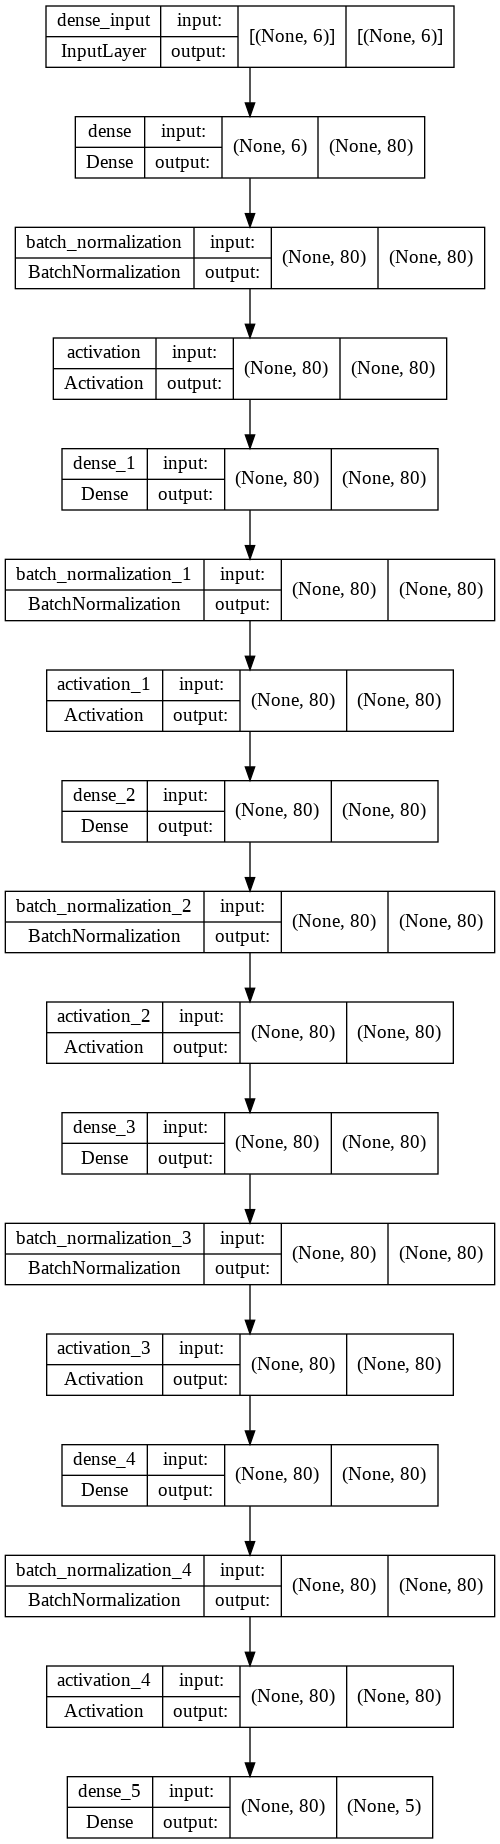

In [ ]:
plot_model(network, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=20, mode='auto', verbose=2)
history = network.fit(X_train, train_pca_norm, batch_size=8, epochs=500, validation_data=(X_val, val_pca_norm), callbacks=[early_stopping, checkpoint])

Epoch 1/500
72/72 [==============================] - 7s 40ms/step - loss: 0.0524 - accuracy: 0.2802 - val_loss: 0.0117 - val_accuracy: 0.2308
Epoch 2/500
72/72 [==============================] - 1s 13ms/step - loss: 0.0134 - accuracy: 0.3870 - val_loss: 0.0091 - val_accuracy: 0.3497
Epoch 3/500
72/72 [==============================] - 1s 12ms/step - loss: 0.0090 - accuracy: 0.5219 - val_loss: 0.0073 - val_accuracy: 0.5175
Epoch 4/500
72/72 [==============================] - 1s 15ms/step - loss: 0.0077 - accuracy: 0.5289 - val_loss: 0.0060 - val_accuracy: 0.4825
Epoch 5/500
72/72 [==============================] - 1s 12ms/step - loss: 0.0075 - accuracy: 0.4904 - val_loss: 0.0047 - val_accuracy: 0.6503
Epoch 6/500
72/72 [==============================] - 1s 10ms/step - loss: 0.0061 - accuracy: 0.5604 - val_loss: 0.0034 - val_accuracy: 0.7203
Epoch 7/500
72/72 [==============================] - 1s 14ms/step - loss: 0.0055 - accuracy: 0.5779 - val_loss: 0.0033 - val_accuracy: 0.7413
Epoch 

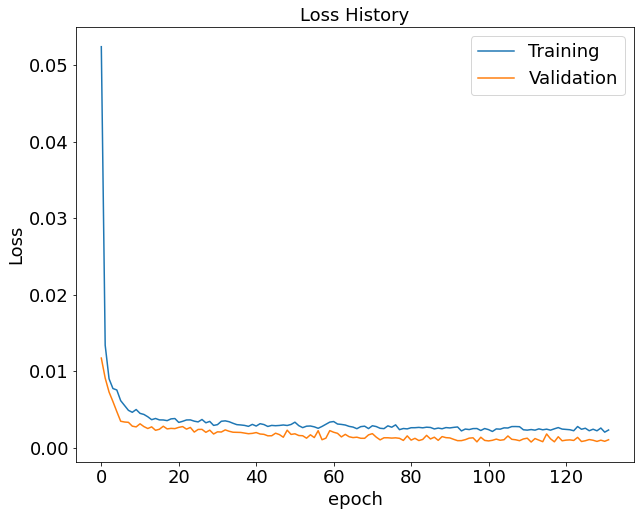

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.figure(figsize=(10,8))
plt.plot(hist['epoch'], hist['loss'], label='Training')
plt.plot(hist['epoch'], hist['val_loss'], label='Validation')
plt.xlabel('epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Loss History", fontsize=18)
plt.legend(fontsize=18)
plt.savefig('loss_history.png', bbox_inches = 'tight')
plt.show()

In [ ]:
model = load_model('best_model.h5')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred_renorm = pca_norm_scaler.inverse_transform(y_pred)

In [ ]:
y_pred_renorm_repca = pca.inverse_transform(y_pred_renorm)
y_pred_renorm_repca

array([[-4.5266599e-08,  1.2246530e+00,  1.2296983e+00, ...,
         2.2888055e+00,  2.2941291e+00,  2.2993793e+00],
       [ 3.5302211e-08,  2.9457662e-01,  3.0142483e-01, ...,
         8.5692853e-01,  8.5467464e-01,  8.5242718e-01],
       [-8.3673960e-08,  8.0752814e-01,  8.0040026e-01, ...,
         9.4898462e-01,  9.5650786e-01,  9.6395350e-01],
       ...,
       [-1.2048491e-07,  1.3999302e+00,  1.3669211e+00, ...,
         7.9171467e-01,  8.0247366e-01,  8.1311131e-01],
       [-1.6283985e-07,  1.3180690e+00,  1.2918912e+00, ...,
        -7.0418888e-01, -7.0205247e-01, -6.9997633e-01],
       [ 2.6043168e-08,  1.1720469e+00,  1.1819463e+00, ...,
         1.9953594e+00,  1.9919188e+00,  1.9884648e+00]], dtype=float32)

In [ ]:
y_pred_renorm_repca_restd = Y_std_scaler.inverse_transform(y_pred_renorm_repca)
y_pred_renorm_repca_restd[0]

array([-4.5266599e-08,  2.2078105e-03,  4.4092941e-03,  6.6003283e-03,
        8.7722214e-03,  1.0900168e-02,  1.2956883e-02,  1.4925566e-02,
        1.6794711e-02,  1.8561162e-02,  2.0228403e-02,  2.1799218e-02,
        2.3280289e-02,  2.4675054e-02,  2.5985856e-02,  2.7221439e-02,
        2.8388765e-02,  2.9492280e-02,  3.0535681e-02,  3.1525813e-02,
        3.2468960e-02,  3.3370852e-02,  3.4235552e-02,  3.5067175e-02,
        3.5869621e-02,  3.6645766e-02,  3.7397813e-02,  3.8127787e-02,
        3.8837187e-02,  3.9527506e-02,  4.0200114e-02,  4.0856164e-02,
        4.1496977e-02,  4.2123910e-02,  4.2738635e-02,  4.3339904e-02,
        4.3931000e-02,  4.4509374e-02,  4.5078062e-02,  4.5637462e-02,
        4.6186883e-02,  4.6728201e-02,  4.7260344e-02,  4.7784474e-02,
        4.8299473e-02,  4.8808150e-02,  4.9309302e-02,  4.9803447e-02,
        5.0292172e-02,  5.0773792e-02,  5.1250115e-02,  5.1720325e-02,
        5.2184671e-02,  5.2644242e-02,  5.3099498e-02,  5.3549197e-02,
      

In [ ]:
Y_test_restd = Y_std_scaler.inverse_transform(Y_test_std)
Y_test_restd[0]

array([0.        , 0.00233054, 0.00465559, 0.00697507, 0.00928197,
       0.01155362, 0.01376047, 0.01587184, 0.01786572, 0.01972606,
       0.02147473, 0.02313362, 0.02471049, 0.02620856, 0.02762013,
       0.02890278, 0.03004154, 0.03110257, 0.03210964, 0.03307216,
       0.03399315, 0.03487409, 0.03571906, 0.03653169, 0.03731542,
       0.03807538, 0.03881413, 0.03953405, 0.04023662, 0.04092291,
       0.04159443, 0.04225182, 0.04289636, 0.04352891, 0.04414968,
       0.04475931, 0.04535824, 0.04594711, 0.04652612, 0.04709529,
       0.04765525, 0.04820621, 0.04874839, 0.0492818 , 0.04980685,
       0.05032441, 0.05083448, 0.05133769, 0.05183405, 0.05232398,
       0.05280707, 0.05328437, 0.05375589, 0.05422205, 0.05468308,
       0.05513876, 0.05558994, 0.05603597, 0.05647752, 0.05691478,
       0.05734775, 0.05777687, 0.05820193, 0.05862312, 0.05904068,
       0.05945439, 0.05986467, 0.06027131, 0.06067473, 0.06107473,
       0.06147131, 0.06186467, 0.06225503, 0.06264219, 0.06302

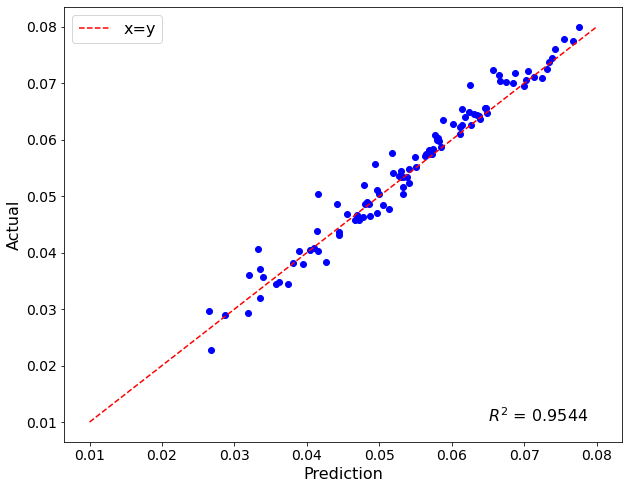

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.scatter(predict_strain005_list, strain005_list, color='b')
x = np.linspace(0.01, 0.08, 2)
y = x
plt.plot(x, y, color='r', label='x=y', linestyle='--')
plt.xlabel('Prediction', fontsize=16) 
plt.ylabel('Actual', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
r2 = r2_score(predict_strain005_list, strain005_list)
# print(f"R2 score for strength:", r2)
# plt.title('1st Component', fontsize=18)
plt.text(0.065, 0.01, f"$R^2$ = {r2:.4f}", fontsize=16)
plt.savefig('strain005_pred_test_R2.png', bbox='tight')
plt.show()

In [ ]:
E_list = []
predict_E_list = []
for i in range(len(Y_test_restd)):
  E_list.append(Y_test_restd[i][2]/0.001)
  predict_E_list.append(y_pred_renorm_repca_restd[i][2]/0.001)

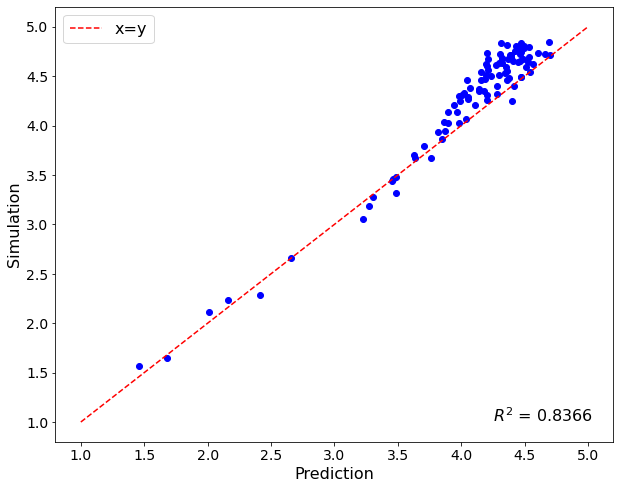

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.scatter(predict_E_list, E_list, color='b')
x = np.linspace(1, 5, 2)
y = x
plt.plot(x, y, color='r', label='x=y', linestyle='--')
plt.xlabel('Prediction', fontsize=16) 
plt.ylabel('Simulation', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
r2 = r2_score(predict_E_list, E_list)
# print(f"R2 score for strength:", r2)
# plt.title('1st Component', fontsize=18)
plt.text(4.25, 1, f"$R^2$ = {r2:.4f}", fontsize=16)
plt.savefig('E_pred_test_R2.png', bbox_inches='tight')
plt.show()

In [ ]:
df_prediction_ss = pd.DataFrame(data=y_pred_renorm_repca_restd, columns=column_list)

In [ ]:
df_prediction_ss

,Strain000,Strain001,Strain002,Strain003,Strain004,Strain005,Strain006,Strain007,Strain008,Strain009,...,Strain091,Strain092,Strain093,Strain094,Strain095,Strain096,Strain097,Strain098,Strain099,Strain100
0,-4.526660e-08,0.002208,0.004409,0.006600,0.008772,0.010900,0.012957,0.014926,0.016795,0.018561,...,0.067524,0.067864,0.068202,0.068539,0.068872,0.069204,0.069534,0.069862,0.070187,0.070510
1,3.530221e-08,0.001743,0.003486,0.005243,0.007020,0.008799,0.010558,0.012276,0.013936,0.015525,...,0.050395,0.050563,0.050730,0.050895,0.051059,0.051221,0.051382,0.051541,0.051699,0.051856
2,-8.367396e-08,0.001999,0.003982,0.005886,0.007659,0.009286,0.010770,0.012120,0.013352,0.014481,...,0.050660,0.050958,0.051256,0.051551,0.051846,0.052138,0.052429,0.052719,0.053007,0.053294
3,2.395400e-08,0.001937,0.003869,0.005799,0.007735,0.009664,0.011565,0.013424,0.015225,0.016958,...,0.064774,0.065086,0.065395,0.065703,0.066009,0.066314,0.066616,0.066916,0.067215,0.067511
4,-2.906509e-08,0.001883,0.003762,0.005640,0.007512,0.009354,0.011142,0.012858,0.014488,0.016027,...,0.055350,0.055618,0.055883,0.056147,0.056410,0.056670,0.056930,0.057187,0.057443,0.057698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.197656e-08,0.001983,0.003964,0.005955,0.007964,0.009976,0.011969,0.013922,0.015817,0.017641,...,0.061485,0.061710,0.061934,0.062156,0.062376,0.062594,0.062810,0.063024,0.063236,0.063446
96,-6.226047e-08,0.002164,0.004322,0.006467,0.008583,0.010643,0.012620,0.014497,0.016265,0.017923,...,0.062096,0.062402,0.062707,0.063010,0.063311,0.063610,0.063907,0.064202,0.064495,0.064786
97,-1.204849e-07,0.002295,0.004546,0.006560,0.008221,0.009569,0.010673,0.011600,0.012411,0.013148,...,0.048404,0.048738,0.049071,0.049401,0.049730,0.050058,0.050383,0.050707,0.051029,0.051349
98,-1.628399e-07,0.002254,0.004471,0.006477,0.008144,0.009489,0.010570,0.011441,0.012159,0.012765,...,0.030565,0.030712,0.030858,0.031002,0.031145,0.031287,0.031428,0.031567,0.031705,0.031842


In [ ]:
error = abs((Y_test_restd[:, 1:] - y_pred_renorm_repca_restd[:, 1:]) / Y_test_restd[:, 1:] * 100)

In [ ]:
error

array([[5.265949  , 5.290303  , 5.372652  , ..., 2.2301407 , 2.213392  ,
        2.1965747 ],
       [0.12361414, 0.19553062, 0.54237825, ..., 4.080024  , 4.0662947 ,
        4.0518394 ],
       [0.6766903 , 0.9862301 , 2.0432737 , ..., 0.16576868, 0.17487818,
        0.18322438],
       ...,
       [0.93803984, 0.11066452, 2.2686749 , ..., 7.4688315 , 7.467751  ,
        7.4673133 ],
       [1.418924  , 0.5047052 , 1.9297483 , ..., 8.2698    , 8.329724  ,
        8.390871  ],
       [9.428308  , 9.3435955 , 9.026645  , ..., 6.882073  , 6.8777575 ,
        6.872818  ]], dtype=float32)

In [ ]:
error_list = []
for i in range(len(error)):
  error_list.append(max(error[i]))
error_list

[5.9947553,
 4.187729,
 5.1225204,
 4.0758896,
 5.0928326,
 5.235147,
 1.9708303,
 6.8525195,
 9.892327,
 7.026287,
 6.297148,
 7.0788875,
 6.784513,
 5.051955,
 5.442564,
 1.1201426,
 10.837271,
 6.622538,
 6.1547666,
 12.325615,
 6.803654,
 7.9799576,
 9.427918,
 4.932127,
 7.002216,
 9.871219,
 11.295664,
 7.8819647,
 7.572303,
 9.453389,
 11.542264,
 5.430682,
 3.9814715,
 4.965476,
 17.671366,
 8.74987,
 10.298771,
 7.7156434,
 9.836147,
 5.943032,
 8.9299345,
 7.864291,
 3.9981122,
 6.6905746,
 6.533644,
 9.139438,
 4.999513,
 7.786895,
 5.872875,
 7.9267397,
 5.139908,
 6.480192,
 7.786522,
 5.450423,
 6.1246786,
 4.824755,
 10.314484,
 11.884305,
 4.7165656,
 6.9443545,
 9.078371,
 5.171463,
 9.212768,
 7.4479437,
 6.135559,
 5.707756,
 3.5869672,
 7.7446795,
 8.721061,
 5.5779057,
 5.6667585,
 8.865992,
 3.6490462,
 7.32757,
 5.680692,
 18.223942,
 7.5163536,
 6.9314084,
 5.696008,
 8.337069,
 7.1700706,
 8.331638,
 11.360619,
 6.730252,
 3.4504519,
 2.9555674,
 17.53165,
 3.7

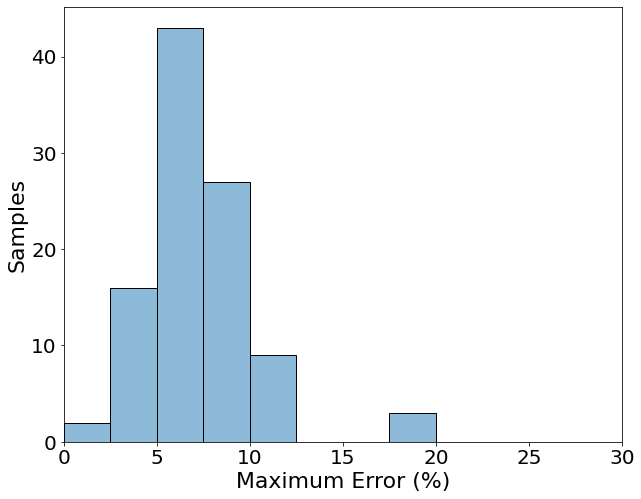

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.histplot(data=error_list, palette='magma', binrange = (0,30), binwidth=2.5, alpha=0.5)
# plt.setp(ax.get_legend().get_texts(), fontsize='16')
plt.xlabel('Maximum Error (%)', fontsize=22)
plt.ylabel('Samples', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.legend(fontsize=14, loc='upper right')
plt.xlim(0,30)
plt.savefig('maximum_error.png', bbox_inches='tight')
plt.show()